In [1]:
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math
import pandas as pd

In [2]:
pip install stellargraph

In [3]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification
from stellargraph import StellarGraph

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

**Human Genome**

In [5]:
dna_sequence = "CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCAGAGGTTGCAGTGAGCCAAGATCGCACCACTGCACTCCAGCCTGGCAACACAGCGAGAGTCTGTCTCCAAAAAAAAAAAAAAAGGCCCAAGAGCATTTCAAACTGTTTGTTGAGAGGTAATCTTATACATTCAGTTTCTTTTGGCTTACCTGAAGAGGTGCTTGGCTATGGTTAACAAACTACGTAAGCTGGTGAAAAAACCTGTCACCTTATCCAGAGAAGCTTCTTCTTTTAGAAAATCAAGCAAAACAACTAAGCCAAGACATGTTAAAAAAAAAGTTTGAAAAGAAAGCTGTAAGGAAATACAAGGGGAGGGATTGTTAGATATGAGTTCTAAATTTCTTTTCAAAAAATCGATATGTCAGTATGTTCAATTCTTTGCCTTCTACTTTTAAACTTCCTCATAAAGCAACCTTTTTCAATTACCTGCTCCACCCTGACTCATTCTGATCACCAAAGGGGCTGATAGAAAAATAAAGAGATTTGGCCAGGTACGGTGGCTCACTCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCTGGCGGATCACCTGAGGTCGGGAGTTCGAGACCAGCCTGACCAACATGGAGAACCCCTGTCTCTACTAAAATTACAAAATTAGCCAGGCATGGTGGCACATGTCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCATTTGAACCAGGGAGGCAGAGGTTAAGTGGATATTCAGACCTCCTTGAGGCCTTCGTTGGAAACGGGATTTCTTCATATTCTGCTAGACAGAAGAATTCTCAGTAACTTCCTTGTGTTGTGTGTATTCAACTCAAAGAGTTCAACGATCCTTTATACAGAGCAGACTTGAAACACTCTTTTTGTGGAATTTGCAAATGGAGATCTCAGCCGCTTTGTGGTCAGTAGTAGAAAAGGAAATATCTTCGTATAAAAACTAGACAGAATGATTCTCAGATACCATGACAAAGATATTATTAGCCAATTTTTAGAGAGAAGGAAAGTAGTTAACCAAAGAAGTTAAGGCATATATCCTGGGTCACACAGCTATCAGACAGGCAGAGCCAAGGTGCACACCTGGATCTTTTTGACTCCAGAGCTGAGCTATCATCTACTACACTGTGCTCTGAGAGACAGACCATATTACAATTCCTGCAAGATCAAAACGCATGGCAGAAGAGATGCTAATGAGATTGCGCTGATCAGTACATGATTGGAAATTAGGCAGCATATCAGAATATCAAAATGAAAATTAGAAAATATTTGACCTGAATATTAATCTCCATCTGCCTGTCTATTAGAAGGATATTTTTCACTGGATTCAGGGCCCACCAGGATAATCCAGGATGATCTCCTTCCCTCAAGATCCTTGACTTAATCACATCTGCAAAGGCCCTTTTTCCAAATAAGTTAACATTTGTAGGTTCTGAGAATTGGGATCAGGCACATTTTTGAGGATCTGCACCAGTGCCCCCCACCACCACCTGCTATTCCAGGCCCCCATCCTAACACCTCCATTGCTCACACCAACAGAATTCCATTAGCAATGTGGAGAATCAGTTGAGTTTAATTATTCAAATCCAGGCATCAGGGGCTTTTAAATGAACCCATTCTTTCTTCCAGAATTCTAAAGTCACCAATATTTTAAAAATAAAAGGTCTCAGATCTCCTGGTCTCTCTTGTCAGTGGACACACTGGCATCAGCCCTGTGGGGGAGTAGGAACCGAGTCCCAAGGCCACAACCTCGCTGGGTGTCCCTGGGCAAGTCTCCTCCCCACTTTGAGCCTTAGTTTTCTGTCTGCAAAATGGGTTAAGTGTTTTCCTGGCCTCCCTCCAGGAGCTGCTGTGTGCGGGTGAAATGCAAAGACCCCTGTGAAAGCGTTGCCCACTGTGCGGCGTGCGGCACCCAGCGCGGAACCGTCCTAATGGGACGCTGAGACCCAGAGGGCGCCCAGGGTGGAAAATCCAAGAGTATGGCCTTGGCCCCTGGTGAGGGCCTTCTTGCTGTGTCATAACATGGCAGAGGGCATCTCATGTCAAGAGGGCAAGAGCAAGAGAGCCAGAGAGATAGCAAACCTGCTTCCATGGTAGCAACATTAATCCAGCCGTCATAAATTCGTTAATCCATTCATGGGGGCAGAGGGATTAGGTTTCCAACACAACTTTTGGAGGACACCTTCAAACCATAACAATGGCAGAGTCCTTGATATTAGAATATGCAGGGTTTGCAAAGCTGTAAACAAACTGGCATGTACTGTTTAGCATAAATAACTCATGTACTATTTAGAGTAAATTATTACATTTACAGAGGAAAAATTAAAATATTTATCAAAATTTTAAGGTATATATCCTTTGACCTAGAAATTCTAGTGGTAGGAATAAATCCTACACAGATAACTATACAAGTTCACTAATATAAATGTGTATAAGGATACATATACACACATGCACACACACAAACTGTTATAGTTCAATAGTGGTTAATATTTTGGGTAATATTTTGAGTAATTTTCTGCATTTCTTATATTGCTATCGTTTCATTTTATTTCCAGCAAAATGTATTGCATTAGAATGTGGGAGAATTCAACTGAGTTGCTGATTGGATTTTCAAACTCATCGCAGAAATCACACCTTTGAAAGCCAAAGCTTTCATTTGTAAAACCTAGGCTTTTTAAGAGAATAAAAGTATTCTTGAAAATCAAAAGGAAGGTACCAGTTGTGCAACAAATGAAATGTTTGTCCATAATTAGAGTAATTGTAACTTGATTTTAAACAGAGGTTTGATTGCATGGTGAGTGTCATAATGCCAAATGATTTTTCCATTGATTCAGGGCCCAGTGTATTCTTAAGTTGATGTTTGATCTCAGCATGTTTAACCTGGCCCAGAATATATCTGGCACCCTTTTGTGTGTGTGTTGTAAATGACTGTTCTTCTGTGTTACAGCTTCATACAAAATTTATTGCTTAGATTGGGGCTTCAAGTGTTGCCTTCAGGATACTGGATATTTATGATGAGTGAGCTAAAGCTTGTTTAGTGTCTATTTTGGGGCTATGGTAGGCAGATCTCTTCCCACTGGTTAGTGTTATTACAGCTGTTGTGATGATCTCATTGAATGTAGCTAAAATGGACTTTTAGTCAGCAACACTTTTAGAAGATTTAGTGTAATGAGTGAGCTTTTCGGGCTTTTGTTTTGTTTCGTTTTTTTGAATCTAGACAGAAGCCTTCTCAGAAACTTCACTGTGATGATTGCTTTCAACTCACAGAGTTGAATATTCCTTTTGATAGAGCAGTTTTGAAAGTCTCTTTTTCTAGCATCTGCAAATGGATAGGTGGAACTCTGTGAAGATTTCTTTGGAAACGGGAATATCTTCACGTAAAAAGTAAACAGAAGCATTCTGAGAAACTCCTTTGTGAGGCTTGTGTTCATCTCCCAGAGTATAACATTGCTTTTCATAGTAGACAGACTTGTTGAGTTAGATTTCACTGGGTACCATTTGCTTATAATTTTTAATCACTATTTTCCAAAGTATCTTTCTGAAATAAGCAAAGTAGTCTGCCAAGTTCCTAGCTCAAGTTAGGAGAGCAGAATATAGGTTAAAAAAATAAATTAAGTTGTGTTTATTTTGTAGTATCTAATTATATTGTATTAGCACAAGTTAGGAATACAGGAAAAGTGCTTACCTTAGAGATGATAAGACAATATATGATAACACTCCAATTTGAATTCACAACAAGTTAACTTCAATAGCAATACAAACAATCTGCTTCTATTCAGCTCCATCTCTACTTCCTTTTAAAGACTGATATTGTAAAATTATATACTTATATACTGTGTATCCAAAAACAGAAACTGATGATGTTTTATGTATTAATCTCTTAAATAATGTAGAAAACAAAATGTTGATTCACAAATGAAAGTTATAGTAATACTAGGTTTTAAACTAATGATAGTTTTTACAAGAACTCATCATTTTTTAAGGCTGCAGAGTATTCCATGGTGTATATGTGCCACATTTTCTTTTGTGTGTGTGTTTTTTTTTTTGTTTTGTTTAAGTTTTTCTTTTATTATTATACTTTAAGTTTTAGGGTACATGTGCACATTGTGCAGATTAGTTACATACGTATACATGTGCCATGCTGGTGCGCTGCACCCACTAACTCGTCATCTAGCATTAGGTATATCTCCCAATGCTATCCCTCCCCCCACACCTGCTGCAGCTTCATTTGCTTTCACACAAACCAGTACGTCGCTTTCACCTGTGACACTAGAACTTCTCCATTACTCTGGGAAATTGAATGTGTGTTGTAAAACTAGGAAAAATCCTGAGGTATATGGCAATGGAACTTCATCCATAGGCAGTGGAAGGATGGTTCTAGATTCAGCTCTAGTCTTTAGGTGCCCTGTGGCAGTGTGCAGAGGCTGTGGGTTTCTGGCCAGAGCGTGGAAGTCAGAAAGCCAAGGCAGGTAGATCACTTGAGGTCAGGAGTTCGAAACCAGCTTGGCCAACATACTGAAACCCCGTCCTTACTAAAAGTACAAAAATTAGCCAATGTGGTGATGCATGCCTGTAATCCCACCTACTCGGGACACTGAGGCAGGAGAATCGCTTGAACCAGGGTGGCGGATGTTGCAATGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGTGACACAGCAAGACTCTGTCTCAAAAAAAAAAAAAAAGACCAGGAGTATAAATAAGCCCCTGCCTTCTTGACTGAAATTTTTACTGAGATAATTATAGAATAGATCTGCATACAGTTAGAAGAAATAATACATAGAGATCCCATATGCACTTTATTTATTTATTTATTTATTTATTTATTTATTTATTTAATGGGTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAGCAAATAACATATTCACCTGACAGTCAGGGCTTGGACATCTTTGAGGAACAATTTTTCAGCCTATTACATTTGGCAATCTGTGTAAAAATCACACAAGAATCTATTTATGTGAAGATTTTGGATTTTAAATTAAGCAGGAAGGGAGAAATTGTATGAATTGGCCATGGGAGTGAGCTAACAGAGAAGACTGTATTTGTCAGGTTCTCCACAGAAACAGAAACAATAGGATGGAGACAGAAGAATATGGGAGAGATATTGGTCCATAAATGTCTTTGCTTGGAATGTCTTTGCCTGGATGATGCTGACTTTATACAATGAGTTGGGAAATATTCCTTCCTCTTGCATTTTCTGGACAAGATTGTGTGAAGTGACTATTATTTCTTCCTTAAATATTTGATAGAATGCCTCATATTTCTCCCTTTTATATCCAAGTCTCACCTGGGTAGGGTTGCCAGATAAAATAAAGAATTTTCAGTTAAAATTGAATTTTAGATAAACAACTAGGACTGAGTCTTCAATGTCAAGGCAAAAAGTGACTGTTTCCCTAGAAACAAATTCTGTGGGCAGACAAAGAGGAGCCATGGACTAGCTCCTCAATCACATCGCTGTCTAATGAACAAAAGAGAAGAGACTACTCATACATATAAAGCAAGTATGTGGGGGGAAGTAAAGGAGCACAGATCCGTTTGTCTATGTATCTTTCTATCATCTATCCACCTGTCTATTAGATTGTGTTAGTTTCCTATGAGTAAGGGTCCATATTAGAAAATGTACTCTAGACAATATAAATCACTATCATAAAGAATTCATGAGAATGATAACATGGCACCAGAACTGTGACAAAACACCAACAAAACAAAACAACAACAACAACAACAAAAAAAACCTACTTATCCCCAAATTTTTCTGATTTATGATAGTTATTATGAGTTTCATTTTTTAAAAATTCCCCTTCTGCTATGGCATGAATATTTGTGTCTCCCCAAAATTCATATTTTGAAGATGGTGAATGGGAGTGCAGAAGCTGCAGCTGAAGGTGCAGCAGGTGGGGAGGATCAAGGCCTGAGAGCCCTGCTGGTTTTCTCAGCAGGGAGGCTGGTAGCCTGGGGCAAGATCTCCATCTTGCTCCCAGCTGTCCGAATATACATTCAGTGCTGTTGGTAGGAAATAGAAGGAGTGAGACTGGCTTTGCTGGCTACATGGGAGCTGGGTGAGGCCTGTCACTGCCAGCTTTCCCCCACTTCCATGGTGGACATCTGAGTTTGTGTTGGGCAGCAAACATTTGTATCCTACTGAAGTTTTAAGAGAAATGTTTTTTCCTATAAATGTATATATTTCTTATTAAAAATTGTGGTTATAAATATTTCTCTCACAAAATATAATTTCTGGGTGACAAAATAAGATATTTTTCTAAATAGGAAAGATTACTTCATCATTTAAGAGTTGTAAAATTGTATAAATAATTCATAGTCTAACTAAACTAAGGACTTTTTAAAAACTACAGTATTAAAAAGTTCAGTCTTGTCTAACTCAAAGCATTAATCTAATACTTGATTTGGAACGTCCCCTCCTGTCAGCTCAGGAATGACTCAGTGTGAGGGGAAGAGAAGCTGTGAGAAGACATAGGGGAGGACTCTGTTCTGGTTTTTTATACTCCTTTCTTCTCTCCCTATCCCACCCTCAACCTTGCCCTTTCCATTTCTGAATCCTGGGAGATGGCAGGGATCAAAAAAGGAGCTAATTTATAACTCGCTCAGTAAGGTTAAGTAACTTCTCAACAACTCAGAGCTCAGCAAGCTACAAATCCAAGTTTCTATATTAAATCTACCAGGTTCCAAAACATATGTTCTTAACCCCTACATTCTAGTGGCTGGTGGTTAAGCTCTTCTATTAACTTGAAGTCAATTCACTCTGCCTCGGTTTCCTTATCTGTCAAATAGGGGAAATCGTTCACTCTCACCATCTTTAAGTTATTGTGAAGACATGCGGTATTGAGCTTAAAGCAAAGAACAGTGTCAAAAATCTAAACGTTTTTCCTTCAACATCTGCATTTGCTTATTAAAAAACAAACCCATCCCACACCCCCAATCTCTCAAACAAGTTAAGTTTGCATGAAATGTTTTTCATTTGTCCTGATATTCAATCTGAAATTTTTTGTGTATCTGAGAGTTTTAGTCTCTTTCATTTCTACATGTCCTTACATATAGGACTTAAGATAGGAGTGGTCTTACAGAATTTTGAGAAAAACGCTAGCTGGGAACACTGCAGTGGGCTTCAAAGCACCAGGACTCATTCCCAGCCCCTGGTGGCTCCTGGGGAAGGGTGAGTTAAACAGGTGAGGAGTGGCCCACTCTTGTCACGGACCTCTGGAATCTTAGCTGCAGAAGACCTCATGACCCCCACAGACATTTAAATTGGCAGAGAGAACTGCCTGGAGAAATGGCAGGGACAGGACTCCACCCTGTGTGGAGCCCAAAGGGTTTGGCACAGGAATGGCTACAGTTTAATACCCAGGAACCTGACTACCTTGAGGTGGTCTTGGGGTCAGGCCTGCAGCTCCAGCCTTGGGGGTGTTCTGCCTGGGCAGCCATCAGGGGAGACTACTTGAGGAGAAGGAGGCGGTGCCTTGGGGTTAAGAAGATGGTGCTCCTCCCTCAGGCTAATGGGAAGGGGAGTTCTTAAATGTCCTGGAGTATCCAGGTCTGGAGAGAAGAGGACATGACCTGAAGCTCAGCAGGTGGTGGTGAGTTTAGAAAACTATAACACAAATTTAGGCACAGCATATACATCTCAGGGAGCTAAGACAGAAAATGAAGGAACTGCAATTCTTCTTGTCTTTCCACTCATGTCACTAAGAGGCACTTATTTACAGTGGAGAAGAGATATAAATGCTCACTTCTAGCAAGTGTGATTTTCAGAGTGATGCCCACAACTGAAACAGAAAGATCCCCGGGCCGGAAGTGGTGGCTGATGCCTGTAATCCCAGCACTTTGGGAGGCTGGTCTCACTCTGTCACCCAAGCTGGAGTGCAGAGGCCTGATCATGACTCACTGCAGTCTCAGCCTCCCTGGGCTCAAGTGATCCTCCCACCTCAGCCTCCCAAGTAGCTGGGACTACAGGAACATGCCACCACACTAGGCTAATTCGCGTATTTTTCTGTAGGGATGGTGACTCCCCCTTTGTTTCCAAGGCCTATTGCAAACTCTTGGCCTCAAGCCATCCTCCTGCCTCAGCCTCCCAAAGTGTTGCGATATGCTAAATATGATGAGATGTTTAAGAAGAAAAAGTGCTGGGGAGGGAGGGACATGTTTCTACCGATAAAAGAAGTTACTTAATTTCTCATCCCTTGGGTTTATTACCAGAGTTCTGAGTTTCGTCTCATAATGTAGCAAAATATTCCATGCAAGAAACCACTAGAATGCACCAGCAAAAGGAAGATGCCGAAATAATGAATGAAAAAGCATTTCCATCATGGTCGTCTCAGACAATGAGATTCCTCCAACAAAATGTAACAGGCAGAAAGTCTGTTTCAAACAAATTAAAAAGCTATGTGTTTTTTAAATTCTTCCCAAATCAGATATATACACACCCACAAAAATAGTGTGTGAAGGAAAGCTGTCATACACAAGAAGTTGTATCCTGAATTCTTCAAGGAAACACATATTGAAATAGGAATTAAGAGTCAGCAACAGATTAATAATTTTTTAAAATTGAGTCTTAAAATGCTACATGGCCCAAAGCTATACTATATGTCAGAGTTCAAGTCTGTTAGAAGAGTCCACTTCCTGAGTTTTTCCCAGCTGTGCTGTCTGAGCTCTGAAAGCACTGTGTCCCAGCCGCGACCAACTTTAGTGGACCCAAGTCCCAACCCAAAACCCTCTCACCTCCGTTCCTCGGTCAATGGCTACTTTGCCCAGCCGCACGGCAATGGGGGCCTAGGGAAAAGCAAAAAGTCTTGGTTGAGGAGGGCATCAAGGCTGATAGTTGCAGGTCTGAGGTGCTATCATGACCTTTTCAAGTGTTTTCTTGATATGAAACAAAGCTGCCACTGCCTGAGTAGTTTGTATAAAAACATCAGATTTCTAGGTGAAGCAGAAAAGAAAGGGAGTGTGGAGCTTGATTCCTTCCCCAGGGGTCTCTATGATGCCATCCTTGAATGAATGATCAAGGCGTGTCCCCCACTGCCTCTGAAGGTACTTCTCGTGGCTGCCACCAGCTGCCTTAACAATTTGGAAGGAAAGGCAGGCCCAAAAGTCATGATTATTATATCCTTATTCTATACTAATTAGCTCATTTCCTAATAGCAGTAGGTGCCAGTGTATCAAAGATATAAGATTGTTCTGAAAACTGCTTAGATGTAACGGAGACTCAGGACACTTTTCTAAATTTTCATTTATTCAAATATTATTTATCTATAGAACTATGGTTTTTAAAAATAACATTTTTAGATCTGTACTATATAACCCTGGTAGAACCAGTATCACACCAAATGTGTTTGATATACTATGGTTTTTTCTATACATACATATCTAGGATAAAGTTTAATTTATGAATTAATCATAGTAAAAGATTCATAACAGTAATGGATAATAAAACAGGAAAATTTTAACAACATGCGAGTATCACTACTTTTGCTCTTTGGGACCATTAAGTAAAATAAGGGTGACTTGAACACAAGGTCTGCAATACCACAACAGTTGATCTAATATCCCATATGGCTACTAGGTGACTAGCAGGCTGGTAGTGGACAGATTTTGCTTAGTTTCTATGTCTTTATCAGTAATTTCTCCCTAAACTCTAACCATAAGTGTAAATCTTCCACAATACATTTAAGCATTTTGGCTATATTATAAATTTTATCTTGGGCTAAGCGCAGTAGCTCACACCTGTAAGCGAAGCACTTTGGGAGGCCGAGGAGGGCAGATCACTTGAGGCCAGGAGTTCGAGACCAGCTGGCCAACATGGTAAAACCCCATCTCTACTAAAAATACAAAAATTAGGAAGCGATTATCCCACCTCAGCCTCGCCAGTAGCTGGGATTACAGGCGCCTGCCACCACGCCCGGCTAATTTTTGTATTTTTAGTAGAGACAGGGTTTTTGCCATGTTGGCCAGCCTGGTCTCAAACTCCTGACCTCAGGTGATCTGCCTGCCTCGGCCTCCCGAAGTGCTGGGATTAGAGACATGAGCCTCTGTGCCTGGCCTAGAAAAAGAGTTTTTATGCCACTCAGAGATATTGAGGGTCTGAGAAGGACTCACAGTTTTCCTCCTGGCTCACAGTGTAGGCTGCAGCCTACTGATTCTTTCAAAGGCTCTGTGATTTCAGTTTTTCTGTGATGTTCTTGTGTTGCTTCTTGAATAAAAGTTCACAGCATGAGTCTCTAAACGGTATTTTGTCTTTCCAAGTGGAAGAGGCATGTTAGCAATGCTTCCAATCCACCATCTTGGAAAAATATTCTTCCCTGTTTTCCTTTATAGTTTTTATCACTTATATATATATATTACCCCCTGCATGACCATTCACCCCTGGACCCCACCCTCCAGCAGCGCCCCCACCACTAGTGAATGCCTTCTTGCCACTCAGTTTGCTCCCAACACCCCTTTCCAGCCACTCACTGAAGCTACCTTGGCAAGTACTCTAGGAGTATGGGAAAATGAAAACAACAAACTCACACACCTGTTTAACATGCATAACTAGTTCTGTCTACCCAGCCAAGGTATATTCTTCTTATGTGGAACATCGACCTATATCCTTGCCTTTCTCTATCTTCCCGTGGCTCTTGGCAATCCTTGGTGATCCCTTGGCTTATGCATGCACCACTCCAATCTCTACCTCCATCTTCATATTATTCTCTTCTCTGGCTCTGTGTATCTTTTCTTCTTCTTATAAGGACACCAGTCATTGGACTTAGGGTTTATCTGAGTCTTAACTGATTATATCTTCAAAGACCCCATTGCCAAATAATGTTGCATTCTAAGGTTCTGGCTGGATGTGAATTTTAGCTCTTGCAAGAAGCTTGGAGGGTAGGTTGGGCACGAGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGTGGATCACCTGACGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGTGAAACCTGTCTCTACTAAAAATACAAAAATTAGCTAGGTGTGGTAGCACGTGCCTGTAATCACAGCTGCACAGGAGGCTGAGGCAGGAAAATCACTTGAACCCCAGAGATGGAGGCTGTAGAGGAGTATAAGCCAGCCACAGACCCAGGGGGCACATCTTACACTGTCTTTGGGAGAAAGAAAAAGTACTAATAACAAATAAATCTGATGGGATTTCAGATGGATTCCAGTCTCATTCTTTTGTGATAGCAGGGAGTGAGGTTTTGATATATTCCCTCTAGAGATGGTTCTAAACATGGAGACCCATCGATATCCAGGTATACCTCCTCTCCTCTCTGATCAATCCAATTGCTAAACAAGACCAGAGCAAGGCAGGACTGTAACCACTACACGGTGCTCCATGGCTTCTACTACTTAACTTGTGGGACTTTGCTGCCTCAGTTTCATCATCAGAAAAATATAAATAATAATAACACCAGGTGTACAGGGATGCTCTATTAAACATTAAAATTGTGTGGGAAGTGCTTTGTAAGTTGTAAATAACTATAAAAATACTAGTGATTTTTTAGAGATTTCTCATAGGACAATATCAGACACAGGAAAAAACAAAAATAAACAACACTGGACTATTTCTCTCCCAACAATGCATTATTCAGCTAATAGAGTTTTCTTAGGGAATTATATTCAACTAATAAAAACAGTATTTTCAAATGGTCCAGAAATGGCATCATGTCCCCAACAGCTGGTACTAATGTTTCAAACTCACAACCACCTCTGAGGACAAATACGAATCTATCCCTTTTACCAATGAAGACATTGAGGGTAAAGGGGTTAAGCGACTCACCTCAACTTGTGGTTCAATTTAGTGGTGTCAAGAAGGGTTGGGGAAATTCCTGGGTGGGTGACTGCAATTGAGCAGGGGCTGACGGCTGGGGCTTATTCTCAAATCTTCAGGGTCAGAGACACTTAGAGCAACCAACACATCCTCTGTCTACCATGTCTGGGCATCCCCCATCAGGGAGAGAACACGATATCCATTCAGTCCTGGCGATGTACTTTCGGAGTACACCCCTGGAGGATGTCCAGGCAGAGGTTTGAGCCAAGGTCCCTTAAAGAGAAGTTCCAGTGTGATCATGCCCTCAACCCCTGCCCACCCACATCCAGGCAGCAGCTATGGGCTGCAGGTGCCCTGGATGGATTCCACACCTGAGGAGAAGCAGCTGTGGCAAGCCCTCCTGGAGCAGCCGTGCGAATGGGTGGATGGCCTTCTACCCCTCAGAACCAACCTGGCCCCCAGGACGTAGCCCCACCAAGCCTCTCTCTCTGGACCCCCATCTCAGGGCCTGCCCTTGGCTAAAGTCAATAAAGTCTGTGTTCACTTACAAACATATCCTGTTGTTTCTTCCCTGCAAGATATCCAGCACACAGGCTGAATTTTTCTTTATAATAATCCTTGGCAAAAGCATAACTTTTCAAAAACCAAATGATTTTAGTGGTGCTATGGCAGCTGCAGTTTTGAGTTAGATTAATGTGGTGAAAACCATCAAATACTTAGAAATTGACTGGGTGCGGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGTAGGTGGATTGGAATTGCAAAGTGAGGGCAGAGTCTATTTATATTGGGTTTAATTAACTCCTCTCCCTGGTGCCACTAAAGCAGCAATCACACTGCAGACAGCACTGATTTGATTGGCAAGAGATGCACCAGGCAGAATATTAAGGGACCAGGCCCCTATAAATAGGCCTAATCACAGCCCCTCACTGGAAAATGGTAAGGAAGACATTAATCAGGCCTGGCACTGTGCCCTAGACCTGCTCCCCTAGGCACTACAGTGGGCTGGTCTCAAACTCATGAGCTCAAGCAATCCACCTGCCTTGGCCTCCCAAAGTGCTGAGATTACAGGCATGAGCCACCGTGCCTGGCCCAGAACTACACTTTTGTATTGCACCTGATAAAATTCAGAGGTCCCTTAAACTGTTACACCTGTTACTCCTTTATAGCAAATATAAGCTTTTATAAATCTATTGCTTCATTTATTTGGGCATATGTTTGTGTGTCCTCTACTTACCAGAAACTCCATGAGGCTTAACATTAAAAACCAGTTATAGGCTGGGTGTGGTGGTTCACGCCTGTAATCCCAACACTTTGGGAGGCCAAGGCAATAGGACTGCTTGAACTCAGGAACTTGAGGCCTCAGTAAGCTAAGAAAATATCACTGCATTTCAGCCTTGGCAACAGGGCAAGACCCCATCTCTTAAAAAAAAAAAAAAAAAGTATAAATTAGCGACACAAGATTTTATTTAAAAATGTATAGCACATTAGGCCAGGCATGGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTTTTAGCCGGGATGGTCTCGATCTCCTGACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCAGGGACTCAGAAGAGGATAGTGTTGTGCCCTTTCACACATTACAATCTAATTAACAAACAACACAGAGGCAGGAACACTGCAGAAGGTCTTGCCAAATGAGGGAGACAGACATACATTTATGTTACAGAGTTCAGAACAGTCTTACTATATCCAATGTCCCACCAACCCATTTTCTTCCTTCCTTTTTTTTCTTCCTTCCTTTTTTTTCTTCCTACCCAAAGCCCAGCCATAACTTTGCAGCTCTTGGTCAAGTTCTGGTTTTCCTAGGCAGAGGACCCTGCGGCCTTCCGCAGTGTTTGTGTCCCTGGGTACTTGAGATTAGGGAGTGGTGATGACTCTTAACGAGCATGCTGCCTTCAAGCATCTGTTTAACAAAGCACATCTTGCACCGCCCTTAATCCATTTAACCCTGAGTGGACACAGCACATGTTTCAGAGAGCACAGGGTTGGGAGTAAGGTCACAGATCAACAGGATCCCAAGGCAGAAGAAGTTTTCTTAGTACAGGCACGTGCCACCACACCCAGCTAATTTTTGTATTTTTTAGTAGAGACGGGGTTTCGCCGTGTTGGCCAGGCTGGTCTTGAACTTCTGACCTCAGGTGATCCGCCCACCTCGGCCTCCCAGAGTGCTGGGATTACAGGCATGAGCCACTGCGCCTGGCCACATTTATTCTTTTACATGTCTGGAGGTCACAAGTCTGCAATAACTTTCACTGGGCTAAAATCAAGGTATCAGTGGGGCTGTACTTCCTCGGTCAGGAGATCGAGACCATCCTGGTCTAACTTGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGTGGTGGCAGGCGCCTGTGGTCCCAGCTACTTGGGAGGCTGAGGCAGAAGAATAGCGTGAACCCGGAAGGCGGAGCTTGCAGTGAGCCCAGATTGCGCCACTGCACTCCAGCCTGGGTGACAGGGCAAGACTCTGTCTCAAAAAAAAAAAAAAGAAAAAAAAAAAAAGCCGGGCAAACTATTGCAGGGACAAAAATTCAAACACCACCTGTTCTCACTCATAGGTGGGAATTGAACAGTGAGAACACTTGGACACAGGAAGGGGAACATCACACACTGGGGCCTATTGTGGGGTGGGGGGATGGGGGAGGGATAGCATTAGGAGATATACCTAATGTAAATGACGAGTTAATGGGTGCAGCACACCAACTTGGCACATGTATACATATGTAACAAACTTGCACGTTGTGCACATGTACCCTAGAAAATAGATTTTTCTAGTTTTATGAAGAATGACATTAATAATTTGATAGGAATAGCACTGAATCTGTAAATTGCTTTGGGCAGTGTAGCCATTTTAATGATATTAATTCTTCCTATTTATGAGCATGGGATGTTTTTCCATTTGTTTGTGTCTTCTCTGATTTCTCTGAGCAGTGTTTTGTAATTCTCTTTGTAGAGATCTTTCACCTTCCTGGGTAGTTATAGTCTAGATTACTAGATATTTTATTCATTTTCTGGATATCTTGATTTTTTAAATAATAACTCTGCATACGTCCAAAGTCAAAATTAAGAGTAGAAATGAAACATCAGGTTAACTCAAACTCAAAGGTAATTGAGATTTAAATGGTATGTTTACTAAAAACATAGATAAGTGAAGCAACATGGGAATTTCTATCGATATTATTCAGATAAATGTCTATTTTCTTCTCCTCGTTTAGCCAGCCACGTGCCTTCAATGCAAGTTTAGCTTGCTGAGTTTTGAGAGGCAGGGGTTTGTGGCACGGTAGCGTGGGGAGGTGACAAGAAAGGGAGCTTGGTGTAAGCTGATGATGTGGGGGCCTCAAACACCCAGCCTAGCAGGGCAGACTTGATGCTTTATGCTGGTGTCATTGGAAAAACCTAGTGTTTTCCCAGATGTTCACAGATGTTCCATGAGGGATGGGGGCTGGATCCCATTCTCCATCCTTCCTTGTCTCATTCTGTTCCCTGGAAGTCTGGCCTCTACCATGTGTTGATGAAAGGAACATTAATGTCACACTGCAAAGAAGTGTGCACACAGACATGAGAGCATTTATGCCTCTTCCCCCTGTTTTTGGAATCAGTATTAGTGGTTATGCTAAAAGTTCTTGCCATTCTTTTGCATCGGTGTTTACACAATATAATACTTTGTTAAGATGCAGAGAATCTAATTTCTATTTTACTGCAGGTAACTCACTCCTACGGTTACATACTATAGAGACAATGCTTTTCTGATTCAAATGGAGTGTTGTAAGAATTAACTAAGATTGTGTATTCTTTGTTGTAAATGGTGTAGTAGATTGCATATTCTTTGTAGACCATTTGCATGTAGACAGAGACTATGGTGCTGGGTGGCTAGGAAGAAAGCTTCCCTGAAGTTTGTTCATGTGCTGGCCATCAGCCATTGTCTTCTAAAAATGGGTACCAGTAGGATGTGGTCTTTGAAACAGCCCTGTTAGAGACAAGATGGTGGTCACAGACTCGGGAGTGCTGCTACAGGTGCGCACCACCACGCCTGGCTAATTTTTGTATTTTTAGTAGAGACGCGGTTTCACCATGTTGGCCAGGATGATCTCGATCTCTTGACCTCGTGATCTGCCTGCCTCGGCCTCTCAGAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCAGCTCACTCTGAATATTTTGAGCGACCTATTTATGATTTGAATTTATTCATTCGAGAAGCACCCCAACATACCTCCTATATGTCAGGCATGGAAAACTGGAAGCATTCCCTTTGAAAACGAGCACAAGACAAGGATGCCCTCTCTCACTACTCCTATTCAGAATAGTGTTGGAAGTTCTGGCCAGGGCAATCAGGCAAGAGAAAGAAATAAAGCATATTCAAATAGGAAGAGAGGAAGTCAAATTGTCTCTGTTTGCAGATGACATGATTTAGAATACCCCATCATCTCAGCCCCAAAACTCCTTAAGCTGATAACCAACTTCAACAAGGTCTCAGGATACAAGCTTCAAGCCCCATGGTCACAAAGTCCTATTTGGGACTCAGGATCTTAGAGGGCAATGGTCCTGAAATGTGAACCCCAAATCCATCTCCCACTGCATAAAACCTCTGACTTGGGTGAATCTGGGCTCCTGGAGAAGCCTGAGGGAGAATGAGCTCCCCATTTCCATGGCTTTCTGTAGCCCAGAGAAGACGCAGAGGCAGAGCCTGGGTAAAGCTGGGAAGGTCAAGGAGATGAGACCCTCCTGTGGGACTGTTGATTCACTCGTACTATCAATATGAACATGATTGTTGCTTTCTAAAGATACCTGAAAAGTAAAGGCAAAGAGATCACAATGTATAGAAAAATAGATGTATCCCCAGGGTCATAGCCTGCTGGAAACTGATGTGTTCCTTTTGAAGAGATTAAGTATAAATTTTCCTTAGTCAGAGGTCTGGAAGAAAAATTGGGGAATAAATAGCACCTTTTCTGATTAAGAATAGGATACCTAACACAAAAAGAGTCCGACACCTGCGAAGCGCGGCACCTGGGGAGGGCGAACCGGGGGCCGCCCGGCCTTCCCGAGCACACCCCCTCGGTACCCGACGCTGCCCCGCGGCCGGAACCTCGTACCTGCGAGGCCCGCGAGCTACAGGCGCGCGCGACGCCTCCTCATCTCAGTGGCTCCTGCTCTCCCTCCGCCTCCTGCTGCCGCCGCCGTCGCCGCTGCCGCCGCTGGAGGCCGGGACACGACTAGCTCAGGACTCCACCGCCGGTAGATATTTCTAACTCTGAGTGGCTATACTCAAAGAATGATGATTAATGGAAGAAAATGAACTTGTGGAGGACTTCTATCCTTATCCTACTCAACATTTTTATTAATTAAGGATGCACAAAGTATGCTTATCAATTTTGCAGACACAAAGCTGGGATGTCAGCTGATATGCTAGGTGACAGAATTAGCATTCAAAAAGAAATGAGCAAGCTAGAAAGACGACTTGCAATGAGTAAGATATTTAATAAGGTTAACTTGTAATACATAGTTGACTGTATCATTCAACCCTTCCTTAAAATTAAAAGATCACTTATAAGTTTTAAATAAGTCCCCCAAACAAATATAAAATCAAATTCTTATCTAAAAACTGAATGAATTCTGTCCTCAAAAAACACATGAGAATATTAGTCATTTTAATGAATTCAATATCTTGAAAATTGTCACCACAACTTCCTTGATATTCAGAGATGTCTTCTTTATCATGAAGGGGATCTGTTTCTCAAAACAAAATATGTATAGCCTCAATTATTTGAAATTTGTTAAACTTGTTTTATATCCTGGTGTATGACCAATGCTGAAAATGTTCTGTAGTTGCAGGATGCAATGTTCTATAGATAGCAATTAGTTCAAGTTTGTGAGTCATATGTTGCAAATCTGTGATTTCAATGATGTTTTATGTTTTTCTGATCAAGTATTGAGAGAGTTGTGTTAAAATCTCCTTTTATAATTGTGTTTGTGCTTGTGATTTCAGCCTTGTTCTCTGCTGGGATCAGAACTGCAACCCCACATCATGCCTTGGAAGAGGCATGTGAGCCCTGAACATCATTTACTGGAAAGCAGGAAGAGGGGTGGAGCCTACTGTCCTGCATCCCATGATGGATCCTTGAAGTTCCAAGTTTTCCTTGCATGACAAGGACACTTCCCAGCATTTCTGGTCCTCATTGCTGCCCATCTATATCATGGGGGCTGGAACCGGGCATTTGGAGCTCTCGATTTGTAACTAATAGAGATTATTCTCATAAATTAACTGTGCTTATGGCATTTTGGTCGTACAGAAACTAATCATCACATAAAAAACAATATTCCCAAGGAAAATGCATCAAACTTCTTACTAAGATACAAGAAAT"
print(len(dna_sequence))

18628


In [6]:
dna_list = []
for i in range(0,len(dna_sequence)-len(dna_sequence)%4,2):
    dna_list.append(dna_sequence[i:i+4])
    
Links = []
for i in range(len(dna_list)-1):
    Links.append((dna_list[dna_list.index(dna_list[i])],dna_list[dna_list.index(dna_list[i+1])]))

In [7]:
network = nx.Graph(Links)

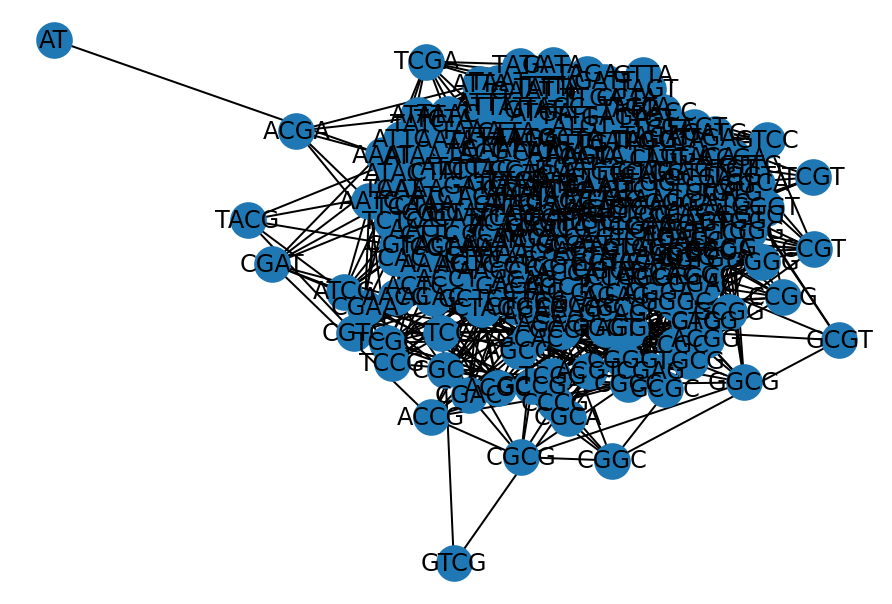

In [8]:
nx.draw(network,with_labels=True)

In [9]:
nodes = network.nodes
nodes

NodeView(('CTAC', 'ACTC', 'TCGG', 'GGGA', 'GAGG', 'GGCT', 'CTGA', 'GGCA', 'CAGG', 'GGAG', 'AGAA', 'AATC', 'TCAC', 'ACTT', 'TTGA', 'GAAC', 'ACCA', 'GAGT', 'GTCA', 'CAGA', 'GGTT', 'TTGC', 'GCAG', 'AGTG', 'TGAG', 'AGCC', 'CCAA', 'AAGA', 'GATC', 'TCGC', 'GCAC', 'CACT', 'CTGC', 'TCCA', 'CAGC', 'GCCT', 'CTGG', 'CAAC', 'ACAC', 'ACAG', 'AGCG', 'CGAG', 'AGAG', 'AGTC', 'TCTG', 'TGTC', 'TCTC', 'CAAA', 'AAAA', 'AAGG', 'GGCC', 'CCCA', 'CAAG', 'AGCA', 'CATT', 'TTTC', 'TCAA', 'AAAC', 'ACTG', 'TGTT', 'TTTG', 'GAGA', 'GGTA', 'TAAT', 'ATCT', 'CTTA', 'TATA', 'TACA', 'TTCA', 'CAGT', 'GTTT', 'TTCT', 'CTTT', 'TGGC', 'GCTT', 'TTAC', 'ACCT', 'GAAG', 'AGGT', 'GTGC', 'TTGG', 'CTAT', 'ATGG', 'TTAA', 'AACA', 'AACT', 'ACGT', 'GTAA', 'AAGC', 'GCTG', 'TGGT', 'GTGA', 'GAAA', 'CTGT', 'CACC', 'CCTT', 'TTAT', 'ATCC', 'CCAG', 'CTTC', 'TCTT', 'TTTT', 'TTAG', 'GCAA', 'ACTA', 'TAAG', 'GACA', 'CATG', 'AAAG', 'AGTT', 'TGAA', 'TGTA', 'AGGA', 'AATA', 'AGGG', 'GATT', 'TTGT', 'GTTA', 'TAGA', 'GATA', 'TATG', 'CTAA', 'AAAT', 'ATTT'

In [10]:
def occurance (c , ch):
  occ = 0
  for i in range (len(ch)):
    if ch[i]==c:
      occ=occ+1
  return occ

In [11]:
def compute_features (node):
  L = [occurance(c,node) for c in "ATGC"]
    
  return (L)  

In [12]:
trans = [compute_features(node) for node in nodes]
Input_AutoEncoder = np.asarray(trans)
print("the shape of our input: ",Input_AutoEncoder.shape)
print(Input_AutoEncoder)

the shape of our input:  (257, 4)
[[1 1 0 2]
 [1 1 0 2]
 [0 1 2 1]
 ...
 [2 0 1 1]
 [0 0 1 3]
 [1 1 0 0]]


In [13]:
Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
Input_AutoEncoder_norm

array([[0.25, 0.25, 0.  , 0.5 ],
       [0.25, 0.25, 0.  , 0.5 ],
       [0.  , 0.25, 0.5 , 0.25],
       ...,
       [0.5 , 0.  , 0.25, 0.25],
       [0.  , 0.  , 0.25, 0.75],
       [0.25, 0.25, 0.  , 0.  ]])

**Auto Encoder**

In [14]:
input_size = 4
hidden_size = 10
code_size = 3

input_array = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_array)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_array = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_array, output_array)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(Input_AutoEncoder_norm, Input_AutoEncoder_norm, epochs=3)

Epoch 1/3
9/9 [==============================] - 0s 2ms/step - loss: 0.6881
Epoch 2/3
9/9 [==============================] - 0s 1ms/step - loss: 0.6807
Epoch 3/3
9/9 [==============================] - 0s 1ms/step - loss: 0.6734


In [15]:
weight1=autoencoder.get_weights()
print (weight1[0].shape)
print (weight1[1].shape)
print (weight1[2].shape)
print (weight1[3].shape)
print (weight1[4].shape)
print (weight1[5].shape)
print (weight1[6].shape)
print (weight1[7].shape)

(4, 10)
(10,)
(10, 3)
(3,)
(3, 10)
(10,)
(10, 4)
(4,)


In [16]:
def ReLu (x):
  return max(0.0 , x)

In [17]:
import math as m
def sigmoid(x):
  return 1 / (1 + m.exp(-x))

In [18]:
def compute_features_auto_encoder (node):
  Input_AutoEncoder = [occurance(c,node) for c in "ATGC"]
  Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
  
  out1 = np.dot(weight1[0].T,Input_AutoEncoder_norm) + weight1[1]
  out2 = [ReLu (x) for x in out1]
  out3 = np.dot(weight1[2].T,out2) + weight1[3]
  out4 = [ReLu (x) for x in out3]
    
  return (out4)  

In [19]:
g_feature_attr = network.copy()
for node, node_data in g_feature_attr.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [20]:
G = StellarGraph.from_networkx(g_feature_attr, node_features="feature")
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 257, Edges: 2959

 Node types:
  default: [257]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [2959]
        Weights: all 1 (default)
        Features: none


In [21]:
edge_splitter_test = EdgeSplitter(G)

In [22]:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 295 positive and 295 negative edges. **


In [23]:
batch_size = 50
epochs = 100  # The number of training epochs for training the GraphSAGE model.

# train, test, validation split
train_size = 0.6
test_size = 0.2
val_size = 0.2

In [24]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_val = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_val, edge_ids_val, edge_labels_val = edge_splitter_val.train_test_split(
    p=val_size, method="global", keep_connected=True
)

** Sampled 532 positive and 532 negative edges. **


In [25]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_val)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 1279 positive and 1279 negative edges. **


In [26]:
print(G_train.info())
print(G_val.info())
print(G_test.info())

StellarGraph: Undirected multigraph
 Nodes: 257, Edges: 853

 Node types:
  default: [257]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [853]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 257, Edges: 2132

 Node types:
  default: [257]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [2132]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 257, Edges: 2664

 Node types:
  default: [257]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [2664]
        Weights: all 1 (default)
        Features: none


In [27]:
num_samples = [10, 5]

In [28]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
val_gen = GraphSAGELinkGenerator(G_val, batch_size, num_samples)
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)

In [29]:
layer_sizes = [32, 32]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
)

In [30]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [31]:
logits = link_classification(
    output_dim=1, output_act="linear", edge_embedding_method="ip"
)(x_out)

prediction = keras.layers.Activation(keras.activations.sigmoid)(logits)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [32]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [33]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy,
             keras.metrics.MeanSquaredError(name='my_mse'),
             keras.metrics.AUC(name='my_auc'),
             f1_m,precision_m,recall_m,
             keras.metrics.FalseNegatives(
             thresholds=None, name=None, dtype=None),
             ],
)

In [34]:
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)
val_flow = val_gen.flow(edge_ids_val, edge_labels_val)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

In [35]:
init_train_metrics = model.evaluate(train_flow)
init_val_metrics = model.evaluate(val_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

12/12 [==============================] - 1s 43ms/step - loss: 0.7948 - binary_accuracy: 0.5000 - my_mse: 0.2928 - my_auc: 0.6968 - f1_m: 0.4956 - precision_m: 0.4917 - recall_m: 0.5000 - false_negatives: 0.0000e+00

Train Set Metrics of the initial (untrained) model:
	loss: 0.7907
	binary_accuracy: 0.5000
	my_mse: 0.2911
	my_auc: 0.6867
	f1_m: 0.6637
	precision_m: 0.5000
	recall_m: 1.0000
	false_negatives: 0.0000

Validation Set Metrics of the initial (untrained) model:
	loss: 0.7922
	binary_accuracy: 0.5000
	my_mse: 0.2917
	my_auc: 0.6888
	f1_m: 0.4900
	precision_m: 0.4836
	recall_m: 0.5000
	false_negatives: 0.0000

Test Set Metrics of the initial (untrained) model:
	loss: 0.7948
	binary_accuracy: 0.5000
	my_mse: 0.2928
	my_auc: 0.6968
	f1_m: 0.4956
	precision_m: 0.4917
	recall_m: 0.5000
	false_negatives: 0.0000


In [36]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=val_flow, verbose=0, shuffle=True,
)

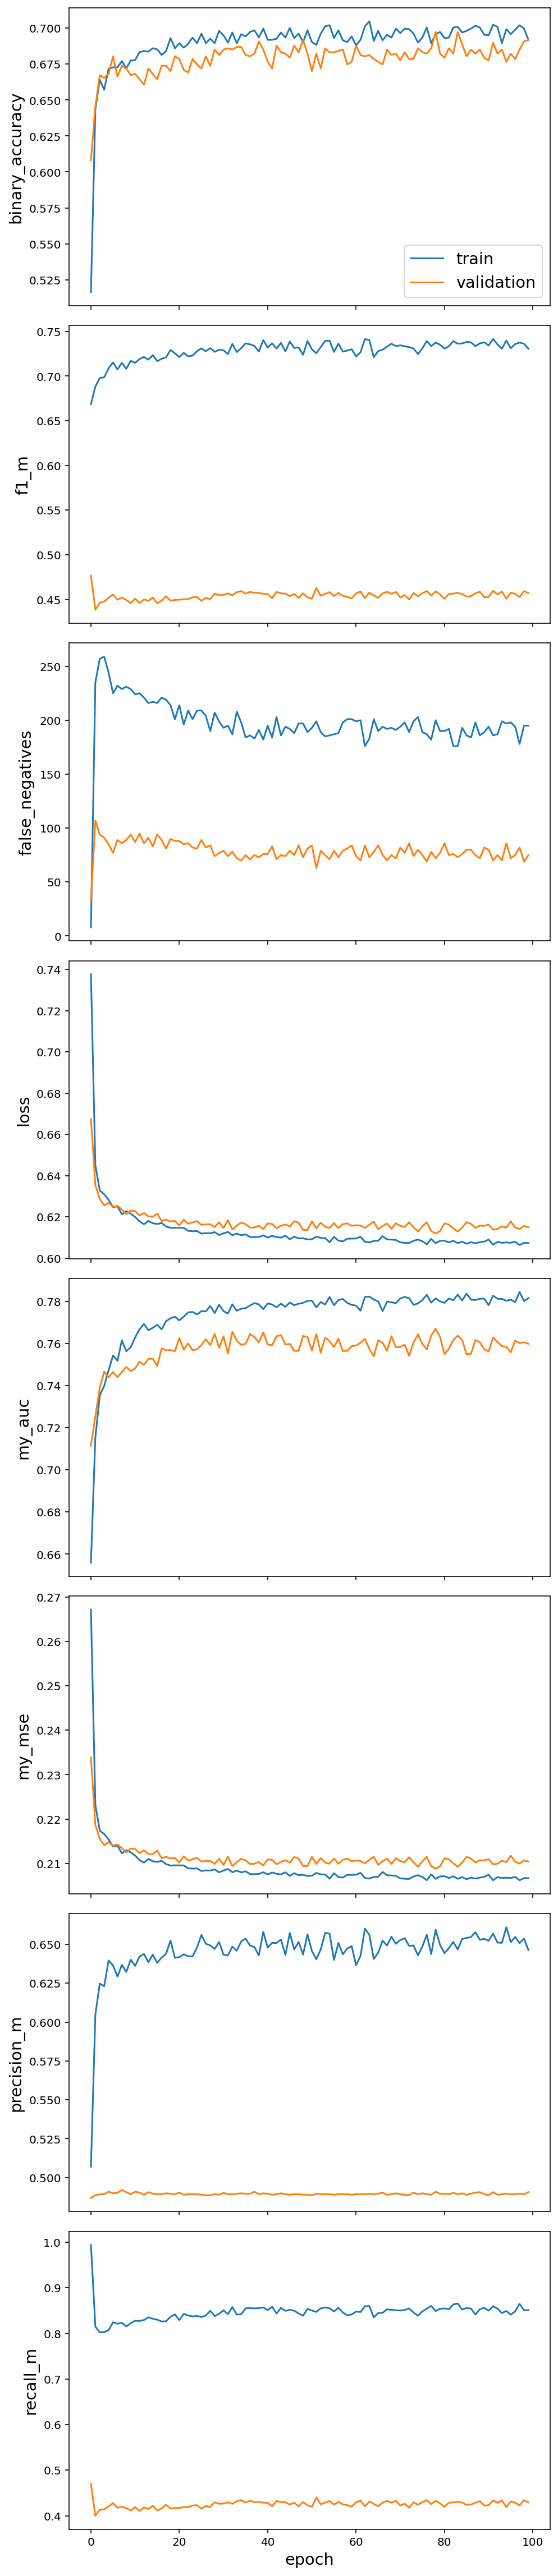

In [37]:
sg.utils.plot_history(history)

In [38]:
train_metrics = model.evaluate(train_flow)
val_metrics = model.evaluate(val_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

12/12 [==============================] - 0s 37ms/step - loss: 0.6172 - binary_accuracy: 0.6695 - my_mse: 0.2116 - my_auc: 0.7665 - f1_m: 0.4600 - precision_m: 0.4947 - recall_m: 0.4315 - false_negatives: 41.0000

Train Set Metrics of the trained model:
	loss: 0.6070
	binary_accuracy: 0.6974
	my_mse: 0.2065
	my_auc: 0.7826
	f1_m: 0.7334
	precision_m: 0.6510
	recall_m: 0.8487
	false_negatives: 196.0000

Validation Set Metrics of the trained model:
	loss: 0.6153
	binary_accuracy: 0.6852
	my_mse: 0.2105
	my_auc: 0.7597
	f1_m: 0.4544
	precision_m: 0.4886
	recall_m: 0.4259
	false_negatives: 77.0000

Test Set Metrics of the trained model:
	loss: 0.6172
	binary_accuracy: 0.6695
	my_mse: 0.2116
	my_auc: 0.7665
	f1_m: 0.4600
	precision_m: 0.4947
	recall_m: 0.4315
	false_negatives: 41.0000


**Generalizability: Ferroglobus placidus**

In [39]:
dna_sequence_test ="TTTGACTGATTTAAGCAAAACATTAAAGTATTTTTCACATTCATTTAAGCTGTGGTAATCACCTACAGCAGAAACGTGTTCCTACCTTTAACGAGATCCTGCAGAAATCGCTGCTACTTGCGGATTTAGGAGAGAGAACGACGGCTTAATGAGCCTCGACTCGATAATCTCTTTGCTAAGGAAAGCGAAAAACGCAACCGAAGCCTTGCTCACGTTTGGAGAACAACCAGAGTTCAGCGAGAAGGTAAAAAAAGATCTTAAGGCTTTAGGATTCAGCAGTTTTTCGGATTACGTTAAGTCCGTCTGCGAAATTGCAATTAAGGAGGGCTTTTTACCCCACACGAATCCGGGAGTCGTTGATACTGACTTTTTGAAGAAGGTTAAAGATTTCAACGCTAGCATGGGGCTTATGCTTGAGCAAGCGGTTGAACTGGAGTGTCACAAAGAGAGTCCCGGAAAGAAGCCGGAAGAAAGAATAAAATTCATAAAAAAAGCTGGAAAGCTGAAAATTCCTTTCACCACCGGAATTTTAGTGGGGATAGGTGAAAAGTTCGAAGACAGAATTTACTCCCTCGAAGTTATAGCAGATTTACACGACAACTACGGACACATTCAGGAGGTGATAATCCAGAATTTTTCACCGAAGAAGGGAACAAAAATGGAAAACTTTAAACCCCCTTCTACTTCCGAAATGCTTGAAACTGTCAAAGTAGCCAGAAAGATTATTCAGAAGGATGTAGCGATCCAAGTTCCTCCGAACTTGGTGAAGGAAGTTGAGGTGTTCGTGAAAGCCGGAGCTAACGATCTTGGAGGAATTTCTGACGTAACTCCAGACTTCATAAATCCCGAACATCCATGGCCGAAGGTTGAGGAGATATCCGAGAGGTTGAAAGGGTACGAATTAAAGGAGAGGTTGCCAATCTATCCAAAATTCGTGGTGGAAGGTTGGTACAGCGAAAAAATCGCTCCGCTTATTGAAGCTTATTCAGACGAGGAGGGTTACAAATGCTGAAAGAACTTCTCGTTAAGGAACCGTTCAAAACGTTCGAAATAGCTAACAAAATCAGAGAGGAGGAAGTAGGAGACGTGGTAACTTACGTCGTTAATAGGAACATAAACTTCACGGACATCTGCATTAACTCCTGCAAATTCTGCTCATATCGGAACAGAAGGAAGTTCGTTTTGTCAACCGACGAGATAAAGAAGAAGGTTGAAGAAGCCGTAAATTACGGCTGCACGGAAGTTTGCATTCAAGGAGGACTTTATCCTAATGCTGATGTGGAATTTTACAAATCTATTTTAAGAGCGGTGAGGGAAGTTTCGAAGGACATTCACATTCACGCATTCTCTCCAATGGAAATCGTGCACGCGGCAAGAAACTCTGGATGCGATGTTGAGGATGTTTTGAGAGAGCTTAAAAAAGCGGGATTGAATTCTATGCCGGGAACAGCTGCTGAAATTCTTGACGACGAAATAAGAAGAATAATCTGTCCGGATAAGCTTTCGGTGGAGGAATGGGTCGACGTTATTAAGACCGCCCATTACTTGGGAATTCCGACGACAGCAACCATAATGTACGGGCACATCGAAAGCTGGGAGCACAGAATAAAGCATCTTATGATCATAAGGGAAATTCAGGAGGAAACTTCCGGATTCACCGAATTCATTCCCCTCCCGTTCATGAACAAAAACAACGAGCTCGGGAAAATAGCAAGGCAATCCTCCGGTTTCGAAGACCTGTTGATGATTTCAATCGCGAGAATAATTCTCCATCCGGTTATCCCGAACATTCAGGCTTCGTGGGTTAAGCTTGGAATATTGCTCAGGCAGCTTTGAATTTCGGAGCAAACGACCTCGGAGGAACATTGATGGAAGAGAACATTTCGAGGCTTGCTGGCTCCACTTCCGGAGAGTTTCTTCCGAAAGAGGAAATGGAAAGATTAATACTGAACGCCGGCAGAATCCCGGCTGAGAGAGATACGCTTTACAGAATAATCAGAGTTAGAGAAAATGTCTGAAATATCACTTTACAGCGTTTTCGCAACGGAGCGAGCGAAGCGTTGAGCAGAGGAACATTCTTTCGAAGGTGAAACTTCCCCTAAAAGTCGTCGAAGTGGATAAAGATTTGTTCCCCGATAAGGCTGAGGAACTTGAGGAGATAGGAGCCTCCTTCGGCGTTCACGGCTTGCCATTAAACGTCCTCTTTTACAAAGATATACCAATTTACGCGAGCGGATTTTTGAGCGAGAAAGACGTTTTAAAGTTAATTGAGGTAACGAAATCGCTCTTAAAAGCGGACGAAAGAAAAGTCTTAGAGGAAGGAAGGAAAGTAATTGAGAAAGTCGAAAACAGAAAAAAGGGTAAAGAGGGTTTAGCTGGATTAGAGCTTCTTTAATAGTGGGAGCAATTCTTTTCGGGATTATGCTGATGAGGCTTGAGGAAGTTGAAAGCGATTTCAAAGTTGCTGGAATACTCTATTTCCTCGGAATGATACTGAGCTTTTTCACAGGAATTATTGGGGTGCTGATCGGAATAGCAACTACAGCTCTAATTTACATCAGCGCAAAAAGCGCTTTAAAGAGGATATCCGCTGCTTGAAGAGAAAATGTTTTATCCAATCCCGTATTACTTATATTCGACCCCAGCGGGGAGGGGTGTGGAGAGAGCTAAGCTTTCGATGAAGCTCCCTGCAAGGCTGGGGTTACACCATGCCGATAGGTCCCCTGGTGAGAGAGCCCTGGCTTTCGATGACCCTGGGGCAACCCGGGCATGGGACAAAGCCCCGAGAGGTCAGCCGTTTGAGAGAGCGCAGCTTTCGATGATATACGGCGTTACACTCGGGGCACAGGAATTAGAAAACCTTTTTGAGTAAATCTTCGAACTCCTCTCTTCTGATAACTCTTCCGTGCCCCGGATAGAGTTTCTCAAACTCAAATTTCAAAACCTTCCTCAGGCTCCTTCTGTATTCTTCGTCGTTCCAGTTGAAGTTTTTCGAGGACAACGTTGGATTGTCACTAAAGACTTTACATCTAACGAGATCTCCGCAAATAAGCGAGTCACCGACGAGAATGGAAATGCTTCCTTCAGTGTGTCCGGGAGTGTGGATTATTTCGAGATCTTTTAACTCCTCTACGCTTTCAACCTCCTCAAGATACTTTGGCTTCTTTATGCTTTCGTAAAACCTCGCAAAAGACCCTATCAAGCCCTTGTATTCGTGTTTCTTAATTCCTTTAAGATATTCGAACTCTTTCGGATGTGCGTATACCTTGCTCTTCAAAATTTTCGAAAGAGCGCGAGCTGAGCCCATGTGATCGAAGTGGGAGTGCGTGAGAATAATTCCTTCGCATTCCTTAACAGCTTCGGCAATTCTCCTTTCATTCCCCGGTAATCCGGTATCTACGACGCCATCAACTACTACGAGGTAAACGTTACAGCCTTTCGCCTTTATCAGTTCCACCATGTTACGAGATCTTTTGAATGTATTTATTAACATTGAGGGGAAATTAGGAATATGTACCGCTTTGTGGAGCATACTGCAGACATAGCTTTTGAAGTTGAAGCTGAAAGCCTCGAAGAGCTTTTTATAGATGCTGCAAACGCCTTTTACGAAGCTTTTTGTAACAGAGACCTTGTCAAAGAGGAGAAGAGAGAAGATTGGAGCTCGAGGAAGAAGACGTAGAGCATCTCCTTTACTCGTGGCTGAACGAGATTCTCTTTCTGTTGATGCCGAGCACTTCGCAGCGAAAAGAGTTGAAGTCAGCGTAGAGAACAACTCTCTAAAAGCGAGACTTATCGGGGGAAAAATAACTCCTGAAGCCTCAAACTCGAACCTAAAGCCATAACGATGCACAAATTCAGAGTTGAAAGGAAGGACGGAAAATATATTTCTTTATGGACAGTAGCACCTGGAGCCCCAAGACCACCGCGGTCACCCGGCCTGTTGAGACCCACGAGCTCATTCGCAATGCAGCCGATATCTCCATCATCGTTATCTACTTCGTGGTAGTGATGGCCGTCGGACTGTGGGCTATGTTTTCCACCAATCGTGGGACTGTTGGAGGCTTCTTCCTGGCAGGCCGAAGTATGGTGTGGTGGCCGATTGGAGCCTCCCTCTTTGCTAGTAACATTGGAAGTGGCCACTTTGTGGGGCTGGCCGGGACTGGGGCAGCTTCAGGCATCGCCATTGGAGGCTTTGAATGGAATGCCCTGGTTTTGGTGGTTGTGCTGGGCTGGCTGTTTGTCCCCATCTATATTAAGGCTGGGGTGGTGACAATGCCAGAGTACCTGAGGAAGCGGTTTGGAGGCCAGCGGATCCAGGTCTACCTTTCCCTTCTGTCCCTGCTGCTCTACATTTTCACCAAGATCTCGGCAGACATCTTCTCGGGGGCCATATTCATCAATCTGGCCTTAGGCCTGAATCTGTATTTAGCCATCTTTCTCTTATTGGCAATCACTGCCCTTTACACAATTACAGGGGGCCTGGCGGCGGTGATTTACACGGACACCTTGCAGACGGTGATCATGCTGGTGGGGTCTTTAATCCTGACTGGGTTTGCTTTTCACGAAGTGGGAGGCTATGACGCCTTCATGGAAAAGTACATGAAAGCCATTCCAACCATAGTGTCTGATGGCAACACCACCTTTCAGGAAAAATGCTACACTCCAAGGGCCGACTCCTTCCACATCTTCCGAGATCCCCTCACGGGAGACCTCCCATGGCCTGGGTTCATCTTTGGGATGTCCATCCTTACCTTGTGGTACTGGTGCACAGATCAGGTCATTGTGCAGCGCTGCCTCTCAGCCAAGAATATGTCTCACGTGAAGGGTGGCTGCATCCTGTGTGGGTATCTAAAGCTGATGCCCATGTTCATCATGGTGATGCCAGGAATGATCAGCCGCATTCTGTACACAGAAAAAATTGCCTGTGTCGTCCCTTCAGAATGTGAGAAATATTGCGGTACCAAGGTTGGCTGTACCAACATCGCCTATCCAACCTTAGTGGTGGAGCTCATGCCCAATGGACTGCGAGGCCTGATGCTATCAGTCATGCTGGCCTCCCTCATGAGCTCCCTGACCTCCATCTTCAACAGCGCCAGCACCCTCTTCACCATGGACATCTACGCCAAGGTCCGCAAGAGAGCATCTGAGAAAGAGCTCATGATTGCCGGAAGGTTGTTTATCCTGGTGCTGATTGGCATCAGCATCGCCTGGGTGCCCATTGTGCAGTCAGCACAAAGTGGGCAACTCTTCGATTACATCCAGTCCATCACCAGTTACTTGGGACCACCCATTGCGGCTGTCTTCCTGCTTGCTATTTTCTGGAAGAGAGTCAATGAGCCAGGAGCCTTTTGGGGACTGATCCTAGGACTTCTGATTGGGATTTCACGTATGATTACTGAGTTTGCTTATGGAACCGGGAGCTGCATGGAGCCCAGCAACTGTCCCACGATTATCTGTGGGGTGCACTACTTGTACTTTGCCATTATCCTCTTCGCCATTTCTTTCATCACCATCGTGGTCATCTCCCTCCTCACCAAACCCATTCCGGATGTGCATCTCTACCGTCTGTGTTGGAGCCTGCGCAACAGCAAAGAGGAGCGTATTGACCTGGATGCGGAAGAGGAGAACATCCAAGAAGGCCCTAAGGAGACCATTGAAATAGAAACACAAGTTCCTGAGAAGAAAAAAGGAATCTTCAGGAGAGCCTATGACCTATTTTGTGGGCTAGAGCAGCACGGTGCACCCAAGATGACTGAGGAAGAGGAGAAAGCCATGAAGATGAAGATGACGGACACCTCTGAGAAGCCTTTGTGGAGGACAGTGTTGAACGTCAATGGCATCATCCTGGTGACCGTGGCTGTCTTTTGCCATGCATATTTTGCCTGAATGCTGCCGCAGCAAGTCGGCTTCGTGTGCGCGGTGCTGGCCCTGGTGTGCTGTGCGTCCGGCCTCTTCGGCAGCTTGGGGCACAAAACAGCTTCTGCTAGCAAACGTGTCCTGCCAGACACATGGAGAAATAGAAAGTTGATGGCCCCAGTGAATGGGACACAGACAGCCAAGAACTGCACAGATCCTGCGATTCACGAGTTCCCCACAGATCTGTTCTCCAATAAGGAGCGACAGCACGGAGCCGTCCTGCTGCACATCCTTGGTGCTCTGTATATGTTCTATGCCTTGGCCATAGTGTGCGATGACTTCTTTGTTCCGTCTCTAGAGAAGATCTGTGAGAGACTCCATCTGAGCGAAGATGTGGCTGGAGCCACCTTCATGGCTGCAGGAAGCTCAACGCCAGAGCTGTTTGCGTCTGTTATTGGGGTGTTCATCACCCATGGGGACGTCGGGGTGGGCACCATCGTGGGCTCTGCTGTGTTCAACATCCTGTGCATAATTGGAGTGTGCGGACTGTTTGCTGGCCAGGTGGTCCGTCTGACGTGGTGGGCCGTGTGCCGAGACTCCGTGTACTACACCATCTCTGTCATCGTGCTCATCGTGTTCATATATGATGAACAAATTGTGTGGTGGGAAGGCCTGGTGCTCATCATCTTGTATGTGTTTTATATTCTGATCATGAAGTACAATGTGAAGATGCAAGCCTTTTTCACAGTCAAACAAAAGAGCATTGCAAACGGTAACCCGGTCAACAGTGAGCTGGAGGCTGGTAATGATTTCTATGACGGTAGCTATGATGACCCTTCCGTGCCATTGCTGGGGCAAGTGAAGGAGAAGCCACAGTATGGCAAGAACCCCGTGGTGATGGTGGACGAGATTATGAGCTCCAGCCCTCCCAAGTTCACCTTCCCTGAAGCAGGCTTACGAATCATGATCACCAATAAGTTTGGACCCAGGACCCGACTACGGATGGCCAGCAGGATCATCATTAATGAGCGGCAGAGACTGATCAACTCGGCCGTGAGCAGTAAGCCGCTTCAAAACGGGAGGCACGAGAACATTGAGAACGGGAATGTTCCTGTGGAAAACCCCGAAGACCCTCAGCAGAATCAGGAGCAGCAGCCGCCGCCACAGCCACCACCGCCAGAGCCAGAGCCGGTGGAGGCTGACTTCCTGTCCCCCTTCTCCGTGCCGGAGGCCAGAGGGGACAAGGTCAAGTGGGTGTTCACCTGGCCCCTCATCTTCCTCCTGTGCGTCACCATTCCCAACTGCAGCAAGCCCCGCTGGGAGAAGTTCTTCATGGTCACCTTCATCACCGCCACGCTGTGGATCGCCTCCTACATCATGGTGTGGCTGGTGACTATTATCGGATACACACTTGGGATCCCGGATGTCATCATGGGCATTACTTTCCTGGCAGCAGGGACAAGTGTTCCAGACTGCATGGCCAGCCTAATTGTGGCGAGACAAGGCCTTGGGGACATGGCAGTCTCCAACACCATAGGAAGCAACGTGTTTGACATCCTGGTAGGACTTGGTGTACCGTGGGGCCTGCAGACCATGGTTGTTAATTATGGATCAACAGTGAAGATCAACAGCCGGGGGCTGGTCTATTCCGTGGTCCTGTTGCTGGGCTCTGTCGCTCTCACCGTCCTCGGCATCCACCTAAACAAGTGGCGACTGGACCGGAAGCTGGGTGTCTACGTGCTGGTTCTCTACGCCATCTTCTTGTGCTTCTCCATAATGATAGAGTTTAACGTCTTTACCTTCGTCAACTTGCCGATGTGCCGGGAAGACGATTAGATGGGTGTCAGGCAACAGTTGGCCTTGCTGCTGCTGCTGCTGCTCCTGCTCTGGGGCCTGGGGCAGCCAGTGTGGCCAGTCGCTGTGGCCTTGACCCTGCGCTGGCTCCTGGGGGATCCCACATGTTGCGTGCTACTTGGGCTGGCCATGTTAGCACGGCCCTGGCTCGGCCCCTGGGTGCCCCATGGGCTGAGCCTGGCAGCTGCGGCCCTGGCACTAACCCTCCTGCCAGCACGGCTGCCCCCAGGACTACGCTGGCTGCCGGCTGATGTGATCTTCTTGGCCAAGATCCTCCACCTGGGCCTGAAGATCAGGGGATGCTTGAGCCGGCAGCCGCCTGACACCTTTGTAGATGCCTTCGAGCGGCGAGCACGAGCGCAGCCTGGCAGGGCACTCTTGGTGTGGACGGGGCCTGGGGCCGGCTCAGTCACCTTTGGTGAGCTGGATGCCCGGGCCTGCCAGGCGGCATGGGCCCTGAAGGCTGAGCTGGGTGACCCTGCGAGCCTGTGTGCCGGGGAGCCTACTGCCCTCCTTGTGCTGGCTTCCCAGGCCGTTCCAGCCCTGTGTATGTGGCTGGGGCTGGCCAAGCTGGGCTGCCCAACAGCCTGGATCAACCCGCATGGCCGGGGGATGCCCCTGGCGCACTCTGTGCTGAGCTCTGGGGCCCGGGTGCTGGTGGTGGACCCAGACCTCCGGGAGAGCCTGGAGGAGATCCTTCCCAAGCTGCAGGCTGAGAACATCCGCTGCTTCTACCTCAGCCATACCTCCCCTACACCAGGGGTGGGGGCTCTGGGGGCTGCATGGTGGCGAGCGCGCGAGTGCAGAAGCTGGTGCGGCGCTACAAGCTGGCGATTGCCACGGCGCTGGCCATCCTGCTGCTGCAGGGCCTGGTAGTGTGGAGCTTCAGCGGCCTGGAGGAGGACGAGGCGGGCGAGAAAGGAAGGCAGAGGAAGCCACGGCCACTGGACCCTGGCGAAGGTTCCAAGGACACAGACAGTTCAGCAGGGCGACGGGGCAGCACAGGCAGAAGGCATGGGCGCTGGCGGGGCCGTGCTGAGAGCCCAGGAGTGCCCGTGGCCAAGGTGGTACGGGCAGTAACCAGCCGGCAGAGAGCCAGCCGGCGGGTCCCACCTGCCCCACCTCCGGAAGCCCCAGGCCGCCAGAACCTGAGTGGGGCAGCAGCTGGGGAGGCGCTGGTAGGGGCAGCTGGCTTCCCACCACACGGAGATACAGGGAGCGTGGAGGGCGCCCCCCAGCCCACGGACAATGGCTTCACCCCCAAGTGCGAGATCGTGGGCAAGGACGCACTGTCTGCACTGGCCCGGGCCAGCACCAAGCAGTGCCAGCAGGAGATCGCCAATGTGGTGTGCCTGCACCAGGCTGGGAGCCTCATGCCCAAGGCTGTGCCCCGGCACTGTCAGCTGACTGGGAAGATGAGCCCCGGCATCCAGTGGGATGAGAGCCAAGCCCAGCAGCCCATGGATGGCCCCCCGGTGCGAATCGCCTACATGCTGGTGGTTCACGGCCGCGCCATCCGCCAGCTGAAGCGTCTCCTCAAGGCCGTTTATCACGAGCAGCACTTCTTTTACATCCATGTGGACAAGCGTTCCGACTACCTGCACCGGGAGGTGGTGGAGCTGGCCCAGGGCTATGATAACGTGCGGGTGACGCCCTGGCGCATGGTTACCATCTGGGGCGGGGCCAGCCTCCTGACGATGTACCTGCGGAGCATGCGGGACCTGCTAGAGGTGCCTGGCTGGGCCTGGGACTTCTTCATCAACCTCAGTGCCACTGACTATCCAACCAGGACCAATGAGGAGCTGTTCCTATCCAAGAACCGGGACAAGAATTTCCTCAAGTCACATGGCCGGGACAACTCCAGGTTCATCAAGAAACAGGGCCTGGACCGGCTCTTCCATGAGTGCGACTCACACATGTGGCGCCTGGGCGAGCGGCAGATCCCAGCAGGCATTGTGGTGGATGGCGGTTCTGACTGGTTCGTGCTGACACGCAGCTTTGTGGAGTATGTGGTGTACACAGATGACCCGCTTGTGGCCCAGCTGCGCCAGTTCTACACATACACACTGCTCCCAGCCGAGTCCTTCTTCCACACGGTGCTGGAGAACAGCCTGGCCTGTGAGACCCTCGTGGACAACAACCTGCGGGTCACCAACTGGAACCGCAAGCTGGGCTGCAAGTGCCAGTACAAGCACATTGTGGACTGGTGTGGCTGCTCCCCCAACGACTTCAAGCCACAGGACTTCCTCCGGCTGCAGCAAGTCTCCAGACCCACCTTCTTCGCCCGGAAGTTCGAGTCGACTGTGAACCAGGAGGTGCTGGAAATCCTGGACTTCCACCTGTACGGCAGCTACCCCCCCGGCACGCCAGCCCTCAAGGCCTACTGGGAGAACACCTACGACGCGGCTGATGGCCCCAGTGGGCTCAGTGATGTCATGCTCACTGCTTACACAGCCTTCGCCCGCCTCAGCCTGCACCATGCCGCCACTGCTGCACCCCCAATGGGCACCCCACTCTGCAGGTTTGAGCCCAGGGGCTTGCCGTCCAGCGTGCACCTGTATTTCTATGACGACCATTTCCAGGGCTACCTGGTGACGCAGGCGGTGCAGCCCTCAGCCCAGGGGCCGGCAGAGACGCTTGAGATGTGGCTGATGCCCCAAGGGTCGCTGAAGCTGTTGGGGCGCAGTGACCAGGCCAGCCGGCTCCAGAGTCTGGAGGTTGGCACTGATTGGGACCCCAAAGAGCGTCTTTTCCGGAACTTTGGGGGGTTACTGGGGCCGCTGGACGAGCCTGTGGCCGTGCAGCGCTGGGCCCGGGGCCCCAACCTAGCCACAGTGGTCTGGATCGACCCAACCTATGTGGTGGCCACATCTTATGACATCACAGTAGATACGGAGACTGAGGTCACGCAATACAAGCCCCCACTGAGCCGGCCCCTGCGGCCAGGGCCCTGGACTGTTCGACTCCTTCAGTTCTGGGAACCGCTGGGTGAGACCCGCTTCCTTGTGCTGCCCTTGACCTTCAACCGCAAACTACCTCTCAGGAAAGATGATGCCAGCTGGCTGCACGCAGGGCCACAACGAGTACATGGAGCAGAGTTTCCAGGGCCTGAGTAGCATCCTGAACCTGCCTCAGCCGGAGCTCGCGGAGGAGGCTGCCCAGCGGCACACACAGCTCACAGGCCCTGCGCTCGAGGCCTGGACAGACAGGGAACTGAGCAGCTTCTGGTCCGTGGCTGGACTGTGTGCCATAGGCCCCTCTCCCTGCCCCTCCCTGGAGCCCTGCAGACTGACCAGCTGGAGCTCTCTGTCCCCCGACCCCAAATCAGAGCTGGGGCCTGTCAAAGCAGACGGGCGACTCAGGTAGATGGCTTTGCCTCTGAGGCCCCTGACCCGGGGCTTGGCCAGCGCTGCCAAAGGAGGCCACGGAGGAGCAGGAGCTCGTACCTGGCGTCTGCTGACCTTCGTGCTGGCGCTGCCCAGCGTGGCCCTCTGCACCTTCAACTCCTATCTCCACTCGGGCCACCGCCCGCGCCCCGAGTTCCGTCCCTACCAACACCTCCGCATCCGCACCAAGCCCTACCCCTGGGGGGACGGCAACCACACTCTGTTCCACAATAGCCACGTGAACCCTCTGCCCACGGGCTACGAACACCCCTGAATGGCATCTACGGAAGGTGCCAACAATATGCCCAAGCAGGTGGAAGTGCGAATGCACGACAGTCATCTTGGCTCAGAGGAACCCAAGCACCGGCACCTGGGCCTGCGCCTGTGTGACAAGCTGGGGAAGAATCTGCTGCTCACCCTGACGGTGTTTGGTGTCATCCTGGGAGCAGTGTGTGGAGGGCTTCTTCGCTTGGCATCTCCCATCCACCCTGATGTGGTTATGTTAATAGCCTTCCCAGGGGATATACTCATGAGGATGCTAAAAATGCTCATTCTCCCTCTAATCATCTCCAGCTTAATCACAGGGTTGTCAGGCCTGGATGCTAAGGCTAGTGGCCGCTTGGGCACGAGAGCCATGGTGTATTACATGTCCACGACCATCATTGCTGCAGTACTGGGGGTCATTCTGGTCTTGGCTATCCATCCAGGCAATCCCAAGCTCAAGAAGCAGCTGGGGCCTGGGAAGAAGAATGATGAAGTGTCCAGCCTGGATGCCTTCCTGGACCTTATTCGAAATCTCTTCCCTGAAAACCTTGTCCAAGCCTGCTTTCAACAGATTCAAACAGTGACGAAGAAAGTCCTGGTTGCACCACCGCCGGACGAGGAGGCCAACGCAACCAGCGCTGTTGTCTCTCATGCCGCGCCCCCGCCTGCTGGCCGCGCTGTGCGGCGCGCTGCTCTGCGCCCCCAGCCTCCTCGTCGCCCTGGATATCTGTTCCAAAAACCCCTGCCACAACGGTGGTTTATGCGAGGAGATTTCCCAAGAAGTGCGAGGAGATGTCTTCCCCTCGTACACCTGCACGTGCCTTAAGGGCTACGCGGGCAACCACTGTGAGACGAAATGTGTCGAGCCACTGGGCCTGGAGAATGGGAACATTGCCAACTCACAGATCGCCGCCTCGTCTGTGCGTGTGACCTTCTTGGGTTTGCAGCATTGGGTCCCGGAGCTGGCCCGCCTGAACCGCGCAGGCATGGTCAATGCCTGGACACCCAGCAGCAATGACGATAACCCCTGGATCCAGGTGAACCTGCTGCGGAGGATGTGGGTAACAGGTGTGGTGACGCAGGGTGCCAGCCGCTTGGCCAGTCATGAGTACCTGAAGGCCTTCAAGGTGGCCTACAGCCTTAATGGACACGAATTCGATTTCATCCATGATGTTAATAAAAAACACAAGGAGTTTGTGGGTAACTGGAACAAAAACGCGGTGCATGTCAACCTGTTTGAGACCCCTGTGGAGGCTCAGTACGTGAGATTGTACCCCACGAGCTGCCACACGGCCTGCACTCTGCGCTTTGAGCTACTGGGCTGTGAGCTGAACGGATGCGCCAATCCCCTGGGCCTGAAGAATAACAGCATCCCTGACAAGCAGATCACGGCCTCCAGCAGCTACAAGACCTGGGGCTTGCATCTCTTCAGCTGGAACCCCTCCTATGCACGGCTGGACAAGCAGGGCAACTTCAACGCCTGGGTTGCGGGGAGCTACGGTAACGATCAGTGGCTGCAGGTGGACCTGGGCTCCTCGAAGGAGGTGACAGGCATCATCACCCAGGGGGCCCGTAACTTTGGCTCTGTCCAGTTTGTGGCATCCTACAAGGTTGCCTACAGTAATGACAGTGCGAACTGGACTGAGTACCAGGACCCCAGGACTGGCAGCAGTAAGATCTTCCCTGGCAACTGGGACAACCACTCCCACAAGAAGAACTTGTTTGAGACGCCCATCCTGGCTCGCTATGTGCGCATCCTGCCTGTAGCCTGGCACAACCGCATCGCCCTGCGCCTGGAGCTGCTGGGCTGTTAG"
print (len(dna_sequence_test))

13174


In [40]:
dna_list_test = []
for i in range(0,len(dna_sequence_test)-len(dna_sequence_test)%4,2):
    dna_list_test.append(dna_sequence_test[i:i+4])
    
Links_test = []
for i in range(len(dna_list_test)-1):
    Links_test.append((dna_list_test[dna_list_test.index(dna_list_test[i])],dna_list_test[dna_list_test.index(dna_list_test[i+1])]))

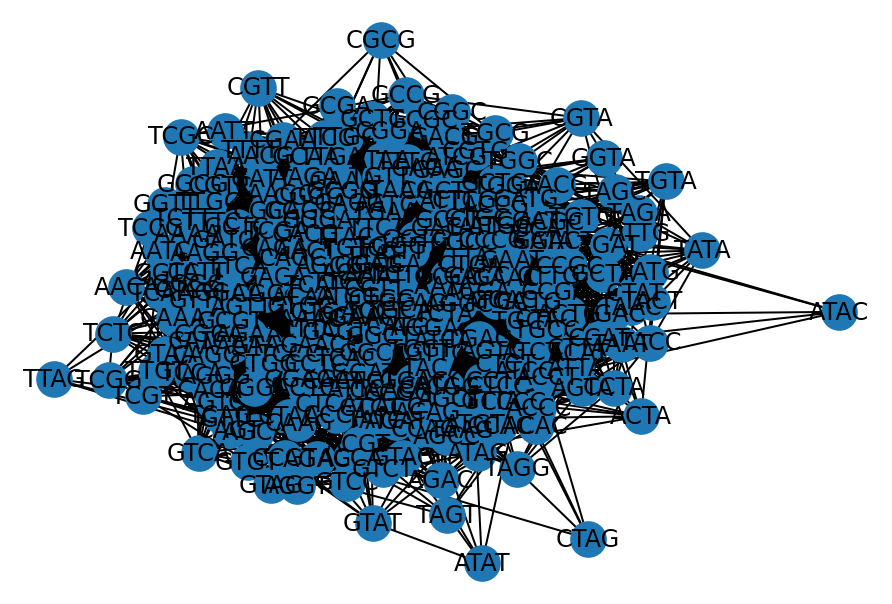

In [41]:
network_test = nx.Graph(Links_test)
nx.draw(network_test,with_labels=True)

In [42]:
nodes_test = network_test.nodes
nodes_test

NodeView(('TTTG', 'TGAC', 'ACTG', 'TGAT', 'ATTT', 'TTAA', 'AAGC', 'GCAA', 'AAAA', 'AACA', 'CATT', 'AAAG', 'AGTA', 'TATT', 'TTTT', 'TTTC', 'TCAC', 'ACAT', 'ATTC', 'TCAT', 'GCTG', 'TGTG', 'TGGT', 'GTAA', 'AATC', 'ACCT', 'CTAC', 'ACAG', 'AGCA', 'CAGA', 'GAAA', 'AACG', 'CGTG', 'TGTT', 'TTCC', 'CCTA', 'TACC', 'CCTT', 'TTTA', 'TAAC', 'ACGA', 'GAGA', 'GATC', 'TCCT', 'CTGC', 'GCAG', 'AGAA', 'AAAT', 'ATCG', 'CGCT', 'GCTA', 'TACT', 'CTTG', 'TGCG', 'CGGA', 'GATT', 'TAGG', 'GGAG', 'AGAG', 'CGAC', 'ACGG', 'GGCT', 'CTTA', 'TAAT', 'ATGA', 'GAGC', 'GCCT', 'CTCG', 'ACTC', 'TCGA', 'GATA', 'ATCT', 'CTCT', 'CTTT', 'TTGC', 'TAAG', 'AGGA', 'GCGA', 'CGCA', 'CAAC', 'ACCG', 'CGAA', 'TGCT', 'CTCA', 'CACG', 'CGTT', 'TGGA', 'GAAC', 'ACAA', 'AACC', 'CCAG', 'AGTT', 'TTCA', 'CAGC', 'GAAG', 'AGGT', 'AGAT', 'AGGC', 'GCTT', 'GGAT', 'TCAG', 'CAGT', 'GTTT', 'TTCG', 'TTAC', 'ACGT', 'GTTA', 'AGTC', 'TCCG', 'CGTC', 'TCTG', 'ATTG', 'TGCA', 'CAAT', 'ATTA', 'GAGG', 'GGGC', 'CCCC', 'CCAC', 'ACAC', 'GAAT', 'ATCC', 'CCGG', 'GGGA'

In [ ]:
trans_test = [compute_features(node) for node in nodes_test]

In [44]:
trans_test = [compute_features(node) for node in nodes_test]
Input_AutoEncoder_test = np.asarray(trans_test)
print("the shape of our input: ",Input_AutoEncoder_test.shape)
print(Input_AutoEncoder_test)

the shape of our input:  (256, 4)
[[0 3 1 0]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [0 0 2 2]
 [0 0 3 1]
 [1 1 1 1]]


In [45]:
Input_AutoEncoder_norm_test = Input_AutoEncoder_test/np.max(Input_AutoEncoder_test)
Input_AutoEncoder_norm_test

array([[0.  , 0.75, 0.25, 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       ...,
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.75, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [46]:
input_size = 4
hidden_size = 10
code_size = 3

input_array = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_array)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_array = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_test = Model(input_array, output_array)
autoencoder_test.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_test.fit(Input_AutoEncoder_norm_test, Input_AutoEncoder_norm_test, epochs=3)

Epoch 1/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 2/3
8/8 [==============================] - 0s 1ms/step - loss: 0.6850
Epoch 3/3
8/8 [==============================] - 0s 1ms/step - loss: 0.6803


In [47]:
weight_test=autoencoder_test.get_weights()

In [48]:
def compute_features_test_auto_encoder (node):
  Input_AutoEncoder = [ord(c) for c in node]
  Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
  
  out1 = np.dot(weight_test[0].T,Input_AutoEncoder_norm) + weight_test[1]
  out2 = [ReLu (x) for x in out1]
  out3 = np.dot(weight_test[2].T,out2) + weight_test[3]
  out4 = [ReLu (x) for x in out3]
    
  return (out4)  

In [49]:
g_feature_attr_test = network_test.copy()
for node, node_data in g_feature_attr_test.nodes(data=True):
    node_data["feature"] = compute_features_test_auto_encoder(node)

In [50]:
Gr_test = StellarGraph.from_networkx(g_feature_attr_test, node_features="feature")
print(Gr_test.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 2836

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [2836]
        Weights: all 1 (default)
        Features: none


In [51]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_test, edge_ids_train_test, edge_labels_train_test = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 1701 positive and 1701 negative edges. **


In [52]:
train_gen_test = GraphSAGELinkGenerator(G_train_test, batch_size, num_samples)

In [53]:
train_flow_test = train_gen_test.flow(edge_ids_train_test, edge_labels_train_test, shuffle=True)